# Introdução 
- Base de dados com as negociações da bolsa de valores de São Paulo. 
- Representa dados de 1994 a 2020, mas será analisado o período de 2015 a 2017. 

- Fonte: https://www.kaggle.com/felsal/ibovespa-stocks

# Ideias 
- Inicialmente poderia verificar o close e comparar com o dia anterior para ver se aumentou ou diminuiu 
- Poderia verificar se certos termos influenciam os acionistas a comprarem ou venderem de acordo com a variável volume
- Poderia fazer um modelo para verificar a influência de certos termos se irão aumentar ou diminuir determinadas ações 


# Hipóteses 

- Um mesmo termo pode influenciar positivamente ou negativamente, dependendo do contexto envolvido. 

# Importação

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#lê o arquivo
stocks = pd.read_csv('b3_stocks_1994_2020.csv')

#converte para datetime
stocks['datetime'] = pd.to_datetime(stocks['datetime'])

#pega apenas o período que será utilizado
stocks = stocks[(stocks['datetime'] > '2015-01-01') & (stocks['datetime'] < '2017-12-30')]
stocks.head(3)

datetime  ticker   open  close   high    low       volume
1337436 2015-01-02  AAPL34  29.65  29.45  29.65  29.45     956435.0
1337437 2015-01-02   ABCB4  12.85  12.55  12.85  12.35    1469337.0
1337438 2015-01-02   ABEV3  16.14  16.01  16.56  15.77  307341972.0

# Características Gerais

In [3]:
#dimensões do dataframe
stocks.shape

(237355, 7)

In [4]:
#informações do dataframe 
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237355 entries, 1337436 to 1574790
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  237355 non-null  datetime64[ns]
 1   ticker    237355 non-null  object        
 2   open      237355 non-null  float64       
 3   close     237355 non-null  float64       
 4   high      237355 non-null  float64       
 5   low       237355 non-null  float64       
 6   volume    237355 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 14.5+ MB


In [5]:
# estatísticas 
stocks.describe()

open          close           high            low  \
count  237355.000000  237355.000000  237355.000000  237355.000000   
mean       49.527973      49.537032      49.798038      49.255801   
std       706.333573     706.335329     706.364278     706.303537   
min         0.010000       0.010000       0.010000       0.010000   
25%         4.240000       4.230000       4.330000       4.150000   
50%        12.100000      12.100000      12.330000      11.920000   
75%        29.910000      29.920000      30.250000      29.500000   
max     76581.000000   76581.000000   76581.000000   76581.000000   

             volume  
count  2.373550e+05  
mean   2.118993e+07  
std    8.915178e+07  
min    1.000000e+00  
25%    3.701800e+04  
50%    4.936390e+05  
75%    1.090868e+07  
max    1.174466e+10

# Características Específicas 

## datetime

In [6]:
# quantidade de dias que a Bolsa negociou 
len(stocks['datetime'].unique())

741

In [7]:
stocks['datetime'].min()

Timestamp('2015-01-02 00:00:00')

In [8]:
stocks['datetime'].max()

Timestamp('2017-12-28 00:00:00')

In [9]:
stocks['datetime'].mean()

Timestamp('2016-07-09 18:59:38.144130048')

## ticker

In [10]:
#empresas negociadas nesse período
len(stocks['ticker'].unique())

667

In [11]:
#algumas empresas tiveram mais dias úteis de negociação que outras 
stocks.groupby('ticker').count().sort_values(by='datetime', ascending=False)

datetime  open  close  high  low  volume
ticker                                          
ITSA4        741   741    741   741  741     741
BPHA3        741   741    741   741  741     741
UCAS3        741   741    741   741  741     741
BRFS3        741   741    741   741  741     741
DTEX3        741   741    741   741  741     741
...          ...   ...    ...   ...  ...     ...
BISA3          1     1      1     1    1       1
MEND3          1     1      1     1    1       1
SOND3          1     1      1     1    1       1
BDLL3          1     1      1     1    1       1
LHER4          1     1      1     1    1       1

[667 rows x 6 columns]

<AxesSubplot:>

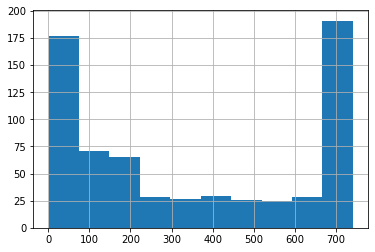

In [12]:
# histograma dos dias de negociação na bolsa de cada empresa
stocks.groupby('ticker').count().sort_values(by='datetime', ascending=False)['datetime'].hist()

<AxesSubplot:>

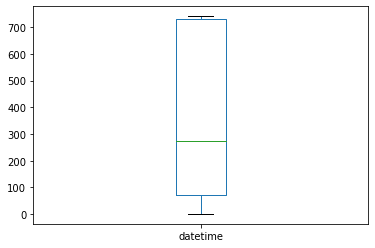

In [13]:
# boxplot dos dias de negociação na bolsa de cada empresa
stocks.groupby('ticker').count().sort_values(by='datetime', ascending=False)['datetime'].plot.box()

In [14]:
#empresas que foram negociadas todos os dias do período
work_day = stocks.groupby('ticker').count().sort_values(by='datetime', ascending=False)
work_day[work_day['datetime'] == 741]['datetime']

ticker
ITSA4    741
BPHA3    741
UCAS3    741
BRFS3    741
DTEX3    741
        ... 
BBDC3    741
MYPK3    741
BBAS3    741
FESA4    741
FIBR3    741
Name: datetime, Length: 142, dtype: int64

## open

In [15]:
stocks['open']

1337436    29.65
1337437    12.85
1337438    16.14
1337439    11.18
1337440     9.10
           ...  
1574786     4.93
1574787    11.72
1574788     8.01
1574789     5.00
1574790    39.70
Name: open, Length: 237355, dtype: float64

In [16]:
stocks[['open']].describe()

open
count  237355.000000
mean       49.527973
std       706.333573
min         0.010000
25%         4.240000
50%        12.100000
75%        29.910000
max     76581.000000

<AxesSubplot:ylabel='Frequency'>

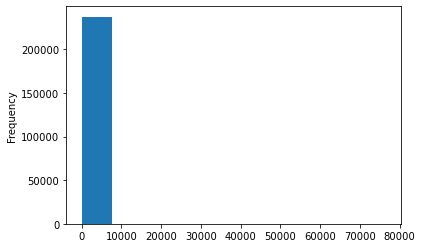

In [17]:
stocks['open'].plot.hist()

<AxesSubplot:>

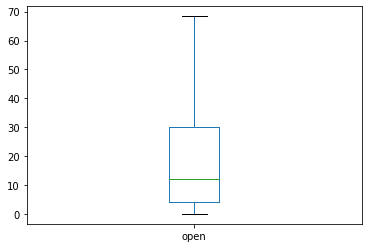

In [18]:
stocks['open'].plot.box(showfliers=False)

<AxesSubplot:xlabel='datetime'>

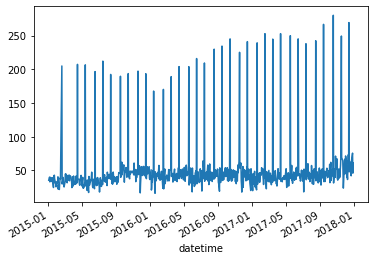

In [19]:
stocks.groupby('datetime').mean()['open'].plot.line()

## close

In [20]:
stocks['close']

1337436    29.45
1337437    12.55
1337438    16.01
1337439    10.91
1337440     8.89
           ...  
1574786     4.99
1574787    11.72
1574788     7.40
1574789     5.25
1574790    40.00
Name: close, Length: 237355, dtype: float64

In [21]:
stocks[['close']].describe()

close
count  237355.000000
mean       49.537032
std       706.335329
min         0.010000
25%         4.230000
50%        12.100000
75%        29.920000
max     76581.000000

<AxesSubplot:ylabel='Frequency'>

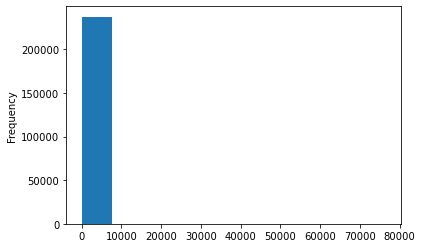

In [22]:
stocks['close'].plot.hist()

<AxesSubplot:>

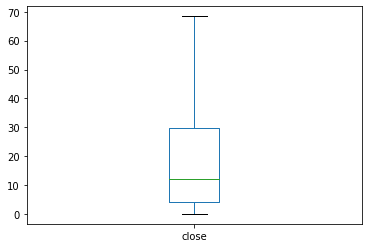

In [23]:
stocks['close'].plot.box(showfliers=False)

<AxesSubplot:xlabel='datetime'>

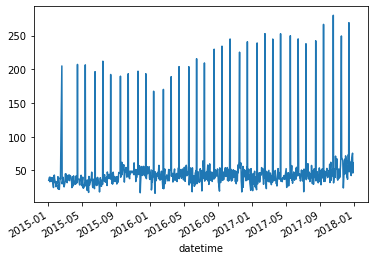

In [24]:
stocks.groupby('datetime').mean()['close'].plot.line()

## high

In [25]:
stocks['high']

1337436    29.65
1337437    12.85
1337438    16.56
1337439    11.38
1337440     9.10
           ...  
1574786     5.00
1574787    12.00
1574788     8.04
1574789     5.25
1574790    40.00
Name: high, Length: 237355, dtype: float64

In [26]:
stocks[['high']].describe()

high
count  237355.000000
mean       49.798038
std       706.364278
min         0.010000
25%         4.330000
50%        12.330000
75%        30.250000
max     76581.000000

<AxesSubplot:ylabel='Frequency'>

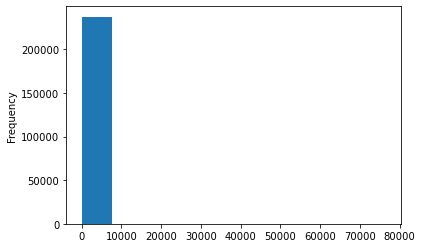

In [27]:
stocks['high'].plot.hist()

<AxesSubplot:>

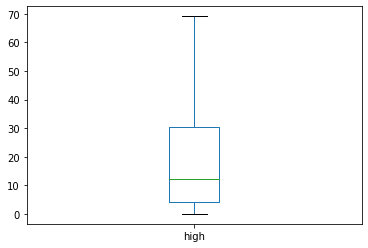

In [28]:
stocks['high'].plot.box(showfliers=False)

<AxesSubplot:xlabel='datetime'>

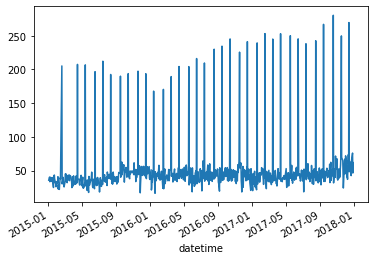

In [29]:
stocks.groupby('datetime').mean()['high'].plot.line()

## low

In [30]:
stocks['low']

1337436    29.45
1337437    12.35
1337438    15.77
1337439    10.66
1337440     8.89
           ...  
1574786     4.72
1574787    11.72
1574788     7.40
1574789     5.00
1574790    39.70
Name: low, Length: 237355, dtype: float64

In [31]:
stocks[['low']].describe()

low
count  237355.000000
mean       49.255801
std       706.303537
min         0.010000
25%         4.150000
50%        11.920000
75%        29.500000
max     76581.000000

<AxesSubplot:ylabel='Frequency'>

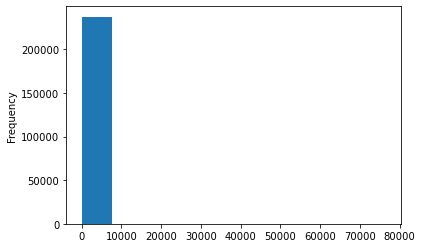

In [32]:
stocks['low'].plot.hist()

<AxesSubplot:>

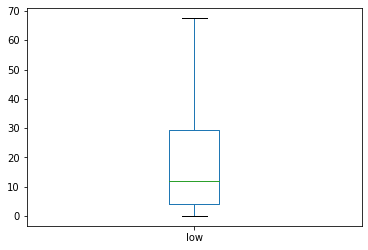

In [33]:
stocks['low'].plot.box(showfliers=False)

<AxesSubplot:xlabel='datetime'>

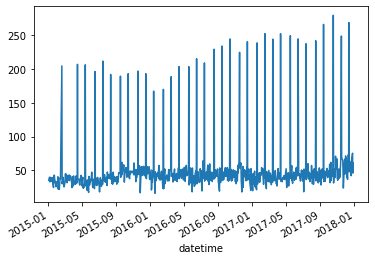

In [34]:
stocks.groupby('datetime').mean()['low'].plot.line()

## volume

In [35]:
stocks['volume']

1337436       956435.0
1337437      1469337.0
1337438    307341972.0
1337439      2802598.0
1337440       258720.0
              ...     
1574786        39627.0
1574787      7143829.0
1574788         3949.0
1574789         3025.0
1574790       139940.0
Name: volume, Length: 237355, dtype: float64

In [36]:
stocks[['volume']].describe()

volume
count  2.373550e+05
mean   2.118993e+07
std    8.915178e+07
min    1.000000e+00
25%    3.701800e+04
50%    4.936390e+05
75%    1.090868e+07
max    1.174466e+10

<AxesSubplot:ylabel='Frequency'>

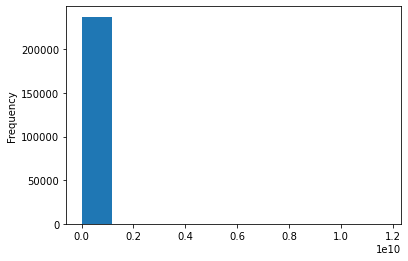

In [37]:
stocks['volume'].plot.hist()

<AxesSubplot:>

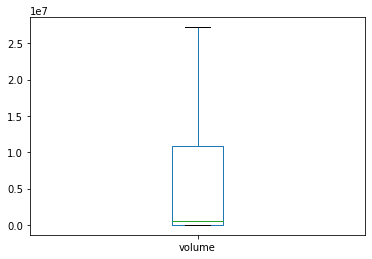

In [38]:
stocks['volume'].plot.box(showfliers=False) 

<AxesSubplot:xlabel='datetime'>

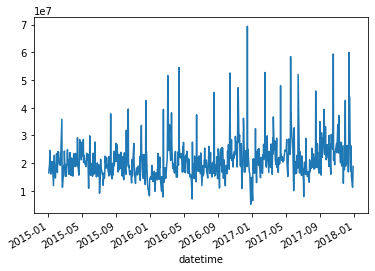

In [39]:

stocks.groupby('datetime').mean()['volume'].plot.line()

# open, close, high, low, volume

In [40]:
stocks_info_day = stocks[['open', 'close', 'high', 'low']]
stocks_info_day.describe()

open          close           high            low
count  237355.000000  237355.000000  237355.000000  237355.000000
mean       49.527973      49.537032      49.798038      49.255801
std       706.333573     706.335329     706.364278     706.303537
min         0.010000       0.010000       0.010000       0.010000
25%         4.240000       4.230000       4.330000       4.150000
50%        12.100000      12.100000      12.330000      11.920000
75%        29.910000      29.920000      30.250000      29.500000
max     76581.000000   76581.000000   76581.000000   76581.000000

<AxesSubplot:>

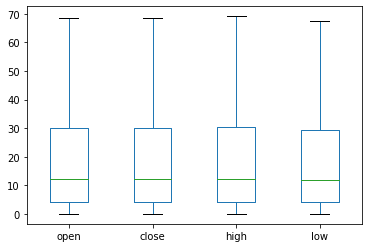

In [41]:
 stocks_info_day.plot.box(showfliers=False)

In [42]:
# as empresas com os 200 maiores volumes no período 
stocks.sort_values(by='volume', ascending=False).head(200)['ticker'].unique()

array(['IBOV11', 'ITSA3', 'CRUZ3', 'ITUB4', 'PETR4', 'VALE3', 'CTIP3',
       'ITUB3', 'VALE5', 'FLRY3', 'BBDC4', 'PETR3', 'BVMF3', 'BBAS3',
       'BRFS3', 'CCRO3', 'ABEV3'], dtype=object)

# Dias atípicos 

<AxesSubplot:xlabel='volume', ylabel='close'>

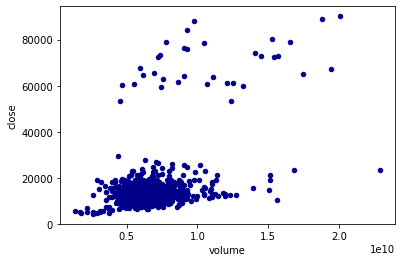

In [43]:
# o que faz fugir do padrão nesses dias? 
stocks.groupby('datetime').sum().plot.scatter(x='volume', y='close', c='DarkBlue')

<AxesSubplot:xlabel='volume', ylabel='open'>

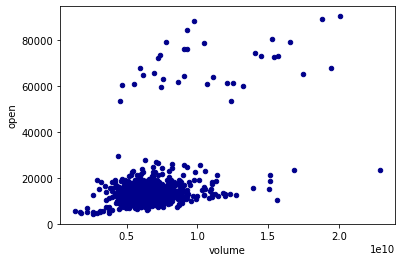

In [45]:
stocks.groupby('datetime').sum().plot.scatter(x='volume', y='open', c='DarkBlue')

<AxesSubplot:xlabel='open', ylabel='close'>

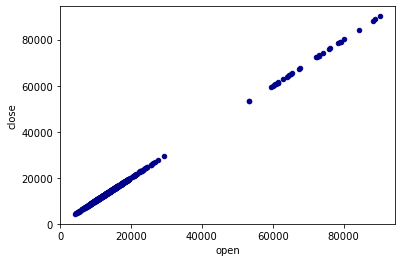

In [52]:
stocks.groupby('datetime').sum().plot.scatter(x='open', y='close', c='DarkBlue')

<AxesSubplot:xlabel='high', ylabel='low'>

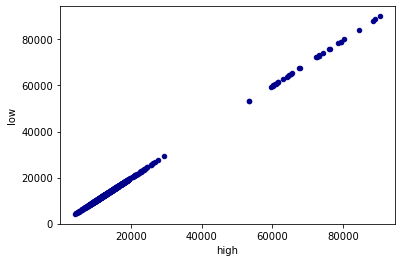

In [66]:
stocks.groupby('datetime').sum().plot.scatter(x='high', y='low', c='DarkBlue')

### Algumas notícias relacionadas aos dias atípicos

#### 2017-03-15 
- https://g1.globo.com/resumo-do-dia/noticia/quarta-feira-15-de-marco-de-2017.ghtml 

#### 2016-04-13
- https://brasil.elpais.com/acervo/2016-04-13/

#### 2017-09-13
- http://g1.globo.com/jornal-nacional/edicoes/2017/09/13.html

In [46]:
# dias que fogem do padrão com aumento do volume e close
stocks_date_mean = stocks.groupby('datetime').sum()
stocks_date_mean[(stocks_date_mean['close'] > 40000) | (stocks_date_mean['volume'] > 1.3e+10)]

open     close      high       low        volume
datetime                                                        
2015-02-18  60858.83  60890.04  60956.63  60809.02  1.065172e+10
2015-04-15  64263.27  64258.44  64335.44  64190.10  9.039387e+09
2015-05-13  64653.58  64666.43  64729.40  64589.66  6.126561e+09
2015-06-17  61525.35  61508.51  61568.18  61457.11  8.658837e+09
2015-07-15  60244.32  60232.99  60289.22  60186.18  4.703410e+09
2015-08-12  61367.77  61357.59  61430.97  61281.03  1.206771e+10
2015-09-16  62777.74  62832.39  62908.06  62731.39  7.586552e+09
2015-10-14  61385.23  61341.00  61455.25  61293.36  1.254146e+10
2015-11-18  60573.25  60556.90  60628.37  60511.07  5.523740e+09
2015-12-16  59960.10  59976.23  60041.32  59872.68  1.321407e+10
2016-01-13  53333.50  53273.66  53386.02  53212.09  4.506832e+09
2016-02-17  53440.63  53453.16  53529.13  53378.06  1.238116e+10
2016-03-04  10438.29  10458.15  10593.28  10306.18  1.564136e+10
2016-03-16  59572.54  59579.53  59677.32  59468.48  7.448600e+09
2016-04-13  65265.96  65274.35  65397.58  65181.22  1.744701e+10
2016-05-18  65458.38  65467.16  65564.67  65380.79  6.919531e+09
2016-06-15  63917.58  63862.80  64004.66  63773.07  1.108990e+10
2016-07-13  72226.17  72262.32  72320.40  72169.97  7.228922e+09
2016-08-17  73086.78  73097.85  73160.41  72998.03  1.448748e+10
2016-09-14  67749.17  67736.89  67798.93  67679.96  5.918955e+09
2016-10-13  73019.00  73015.90  73094.68  72941.08  1.566480e+10
2016-11-10  21176.87  21145.90  21365.90  20919.43  1.514839e+10
2016-11-11  14900.01  14829.08  15039.02  14674.26  1.507721e+10
2016-11-16  78359.69  78454.86  78544.15  78261.79  1.050252e+10
2016-12-14  67481.97  67459.89  67558.28  67407.09  1.943764e+10
2017-01-18  73186.94  73166.22  73250.27  73109.93  7.375071e+09
2017-02-15  79116.94  79169.36  79250.60  79055.27  1.651203e+10
2017-03-15  76115.49  76177.87  76233.56  76018.98  9.033522e+09
2017-04-12  74332.85  74329.82  74399.13  74265.61  1.409060e+10
2017-05-17  79197.23  79196.69  79283.68  79099.98  7.814993e+09
2017-05-18  23275.33  23425.34  23628.84  23096.21  2.286908e+10
2017-06-14  72534.21  72557.42  72627.88  72468.71  1.540085e+10
2017-07-12  75884.27  75907.62  75972.05  75813.16  9.247421e+09
2017-08-16  80220.59  80231.50  80319.44  80128.55  1.524694e+10
2017-09-13  88248.35  88278.74  88359.58  88152.74  9.731507e+09
2017-09-15  18745.32  18818.87  18890.44  18675.38  1.514406e+10
2017-10-18  88782.89  88826.08  88889.45  88713.92  1.882922e+10
2017-11-16  84257.23  84323.41  84419.41  84195.57  9.239627e+09
2017-11-30  15458.45  15414.54  15539.83  15282.44  1.395938e+10
2017-12-13  90187.26  90176.22  90311.14  90078.71  2.009998e+10
2017-12-15  23330.75  23342.27  23450.27  23248.96  1.679029e+10

# Porcentagem em relação ao dia anterior
- pode ser que não seja interessante trabalhar com os outliers 
- mas pode ser que os outliers representem melhor a análise 

In [47]:
stocks['per'] = 100*(stocks['close'] - stocks['open'])/stocks['open']
stocks.sort_values('per')

datetime ticker   open  close   high    low      volume         per
1480905 2016-11-04  MMXM3  15.09   7.50  15.09   7.50   8479987.0  -50.298211
1427907 2016-03-08  CBMA3   0.02   0.01   0.02   0.01      5900.0  -50.000000
1420174 2016-01-29  CBMA4   0.02   0.01   0.02   0.01      2200.0  -50.000000
1339565 2015-01-12  TOYB3   0.02   0.01   0.02   0.01       783.0  -50.000000
1341136 2015-01-19  TOYB3   0.02   0.01   0.02   0.01      4020.0  -50.000000
...            ...    ...    ...    ...    ...    ...         ...         ...
1501126 2017-02-07  BMIN4   0.30   0.68   0.68   0.30   3653900.0  126.666667
1512353 2017-03-29  RNEW4   0.36   0.85   1.18   0.36    185108.0  136.111111
1478362 2016-10-24  TELB4  22.15  53.01  53.01  22.00  25526159.0  139.322799
1416376 2016-01-11  TELB4   0.75   1.81   2.24   0.75   3800088.0  141.333333
1364454 2015-05-11  CBMA4   0.01   0.04   0.04   0.01     75800.0  300.000000

[237355 rows x 8 columns]

In [48]:
stocks['per'].describe()

count    237355.000000
mean          0.017932
std           3.641539
min         -50.298211
25%          -1.081357
50%           0.000000
75%           0.869565
max         300.000000
Name: per, dtype: float64

<AxesSubplot:>

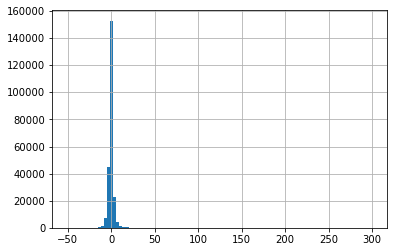

In [49]:
stocks['per'].hist(bins=100)

<AxesSubplot:>

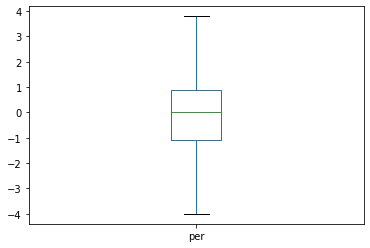

In [50]:
stocks['per'].plot.box(showfliers=False)

<AxesSubplot:xlabel='volume', ylabel='per'>

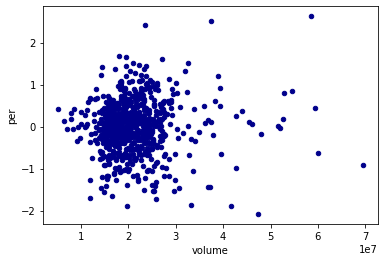

In [64]:
stocks.groupby('datetime').mean().plot.scatter(x='volume', y='per', c='DarkBlue')